# ML Regularized Logistic Regression - Using One-vs-All

We will use a one-vs-all logistic regression to recognize hand-written digits.

The data set contains the images pixels row-wise (20x20) plus its label.
The digits are labeled from 1 through 10 where 10 represent 0.

In [2]:
import pandas as pd
import numpy as np
# import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

## =========== Part 1: Loading and Visualizing Data =============

In [83]:
data = pd.read_csv('ex3data1.txt', names=[str(i) for i in range(1, 402)])
data = data.astype('float128')
print('Profiling Data')
print(data.info())
print(data.head())

Profiling Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 401 entries, 1 to 401
dtypes: float128(401)
memory usage: 30.6 MB
None
     1    2    3    4    5    6    7    8    9   10 ...   392  393  394  395  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

   396  397  398  399  400  401  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 401 columns]


In [84]:
x = np.array(data[[str(i) for i in range(1, 401)]]) # training set
y = np.array(data['401']) # labels (1 through 10, where 10 is 0)
[m, n] = np.shape(x)

Text(0.5, 1.0, 'Digits: 0.0, 9.0')

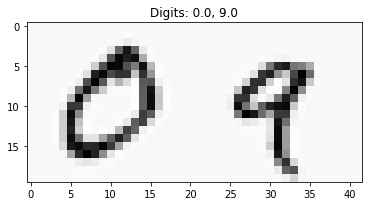

In [85]:
digitMatrix = np.column_stack([np.reshape(x[0], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[4500], [20, 20]), np.zeros([20, 1])])
plt.imshow(digitMatrix, cmap='Greys', interpolation='nearest')
plt.title("Digits: %s, %s" % (y[0], y[4500]))
# plt.show()

## ============ Part 2a: Vectorize Logistic Regression ============